In [1]:
#import

#library
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

#data
import sys
#!{sys.executable} -m pip install geocoder 
#!{sys.executable} -m pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45)  

alt.data_transformers.disable_max_rows()
set_config(transform_output="pandas")

heart_disease

{'data': {'ids': None,
  'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
  0     63    1   1       145   233    1        2      150      0      2.3   
  1     67    1   4       160   286    0        2      108      1      1.5   
  2     67    1   4       120   229    0        2      129      1      2.6   
  3     37    1   3       130   250    0        0      187      0      3.5   
  4     41    0   2       130   204    0        2      172      0      1.4   
  ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
  298   45    1   1       110   264    0        0      132      0      1.2   
  299   68    1   4       144   193    1        0      141      0      3.4   
  300   57    1   4       130   131    0        0      115      1      1.2   
  301   57    0   2       130   236    0        2      174      0      0.0   
  302   38    1   3       138   175    0        0      173      0      0.0   
  
       slope   ca  thal  


read data

In [92]:
column_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeack', 'slope', 'ca', 'thal', 'num']
                
heart_disease = pd.read_csv('../data/heart_disease/processed.cleveland.data',
                            encoding='ISO-8859-1',
                            header=None,
                            names = column_names
                 ).dropna()

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [93]:
print(heart_disease.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeack    float64
slope       float64
ca           object
thal         object
num           int64
dtype: object


In [94]:
train_df, test_df = train_test_split(heart_disease, test_size=0.2, random_state=123)

train_df.shape



(242, 14)

preprocessing

In [99]:
preprocessor = make_column_transformer(
     (StandardScaler(),["trestbps", "chol"]),
     remainder="passthrough",
    verbose_feature_names_out=False,
)
train_scaled = preprocessor.fit_transform(train_df)
test_scaled =  preprocessor.fit_transform(test_df)
train_scaled

,trestbps,chol,age,sex,cp,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,num
102,-0.205417,1.070704,57.0,0.0,4.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,0
261,0.242934,1.374468,58.0,0.0,2.0,1.0,2.0,152.0,0.0,0.0,1.0,2.0,3.0,3
228,-1.214204,-0.770863,54.0,1.0,4.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3
288,-0.093329,-0.486085,56.0,1.0,2.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
78,-0.093329,-0.030439,48.0,1.0,2.0,0.0,2.0,180.0,0.0,0.2,2.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.467109,-1.321434,59.0,1.0,4.0,0.0,0.0,162.0,1.0,0.0,1.0,1.0,7.0,2
83,2.708859,0.520132,68.0,1.0,3.0,1.0,2.0,150.0,1.0,1.6,2.0,0.0,7.0,3
17,0.467109,-0.144350,54.0,1.0,4.0,0.0,0.0,160.0,0.0,1.2,1.0,0.0,3.0,0
230,0.242934,-0.960715,52.0,0.0,3.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0,0


In [97]:
plot_df = train_scaled

plot_df["num"] = plot_df["num"].replace({
     0:"N",
     1:"Y",
     2:"Y",
     3:"Y",
     4:"Y",
})

heart_disease_chart = alt.Chart(plot_df, title='The relationshp of Serum Cholesterol and Resting Blood Pressure toward Heart disease').mark_point().encode(
    x=alt.X('trestbps', title='Resting Blood Pressure on Admission to Hospital (mmHg)', scale=alt.Scale(zero=False)),
    y=alt.Y('chol', title="Serum Cholesterol (mg/dL)", scale=alt.Scale(zero=False)),
    color=alt.Color("num", title = "presence of heart disease")
)

heart_disease_chart

alt.Chart(...)

array([[<AxesSubplot: title={'center': 'trestbps'}>,
        <AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'age'}>],
       [<AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'fbs'}>],
       [<AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>,
        <AxesSubplot: title={'center': 'exang'}>],
       [<AxesSubplot: title={'center': 'oldpeack'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'num'}>]], dtype=object)

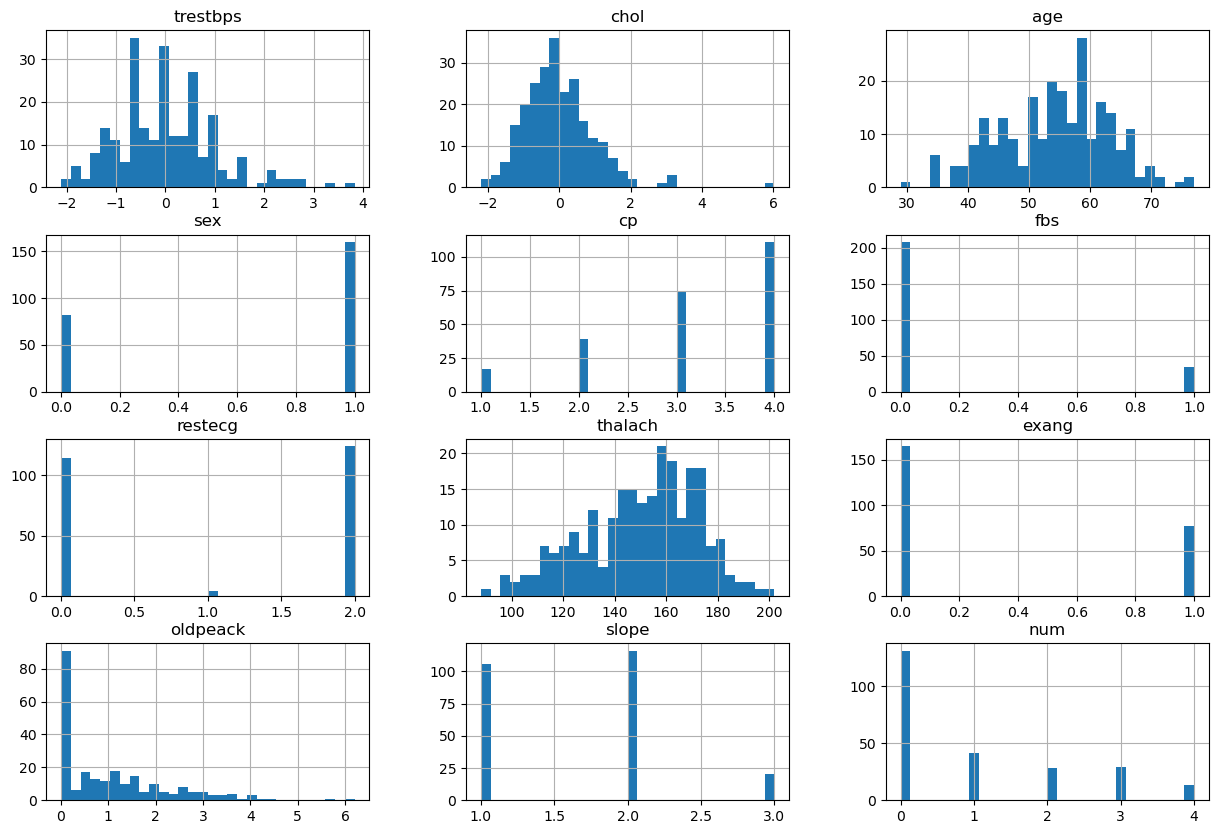

In [95]:
train_scaled.hist(bins=30, figsize=(15, 10))

In [ ]:
# X_df = heart_disease.drop(columns=['age', 'sex', 'restecg', 'thalach', 'exang', 'oldpeack', 'slope', 'ca', 'thal', 'num'])
# y_df = heart_disease['num']

# X_df

# X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=123)
# X_train.shape

In [ ]:
# what kind of graph
# count what each cate

In [ ]:

heart_disease["presence"] = heart_disease["presence"].replace({
    0:"N",
    1:"Y",
    2:"Y",
    3:"Y",
    4:"Y",
})

heart_disease["cp"] = heart_disease["cp"].replace({
    1:"typical",
    2:"atypical",
    3:"non-anginal",
    4:"asymptomatic",
})

heart_disease['sex'] = heart_disease['sex'].map({0: 'Female', 1: 'Male'})


heart_disease

heart_disease_chart = alt.Chart(heart_disease).mark_point().encode(
    x=alt.X('trestbps', title='Resting Blood Pressure on Admission to Hospital (mmHg)', scale=alt.Scale(zero=False)),
    y=alt.Y('chol', title="Serum Cholesterol (mg/dL)", scale=alt.Scale(zero=False)),
    color=alt.Color("presence", title = "presence of heart disease")
).facet(
     "cp",
     title="Scatter plot of chances of getting heart disease by cp"
)

heart_disease_chart
# heart_disease_chart = alt.Chart(heart_disease).mark_point().encode(
#     x=alt.X("thestbps:Q")
#     .title("Resting Blood Pressure on Admission to Hospital (mmHg)")
#     .scale(zero=False),
#     y=alt.Y("chol")
#     .title("Serum Cholesterol (mg/dL)")
#     .scale(zero=False),
#     color=alt.Color("num").title("Percentage of diameter narrowing")
# ).facet(
#     "sex",
#     title="Scatter plot of chances of getting heart disease by sex"
# )

In [ ]:
heart_disease.dropna()
heart_disease = heart_disease.dropna()

X_df = heart_disease.drop(columns=['age', 'sex', 'restecg', 'thalach', 'exang', 'oldpeack', 'slope', 'ca', 'thal', 'num'])
y_df = heart_disease['num']

X_df

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=123)
X_train.shape
# preprocessor = make_column_transformer(
#     (StandardScaler(),["trestbps", "chol"]),
#     remainder="passthrough"
# )

# knn = KNeighborsClassifier()

# X_var = heart_disease[["trestbps", "chol"]]
# y_var = heart_disease["num"]

# heart_disease_pipe = make_pipeline(preprocessor, knn).fit(X_var, y_var)

#categorical 
#    sex, cp, 
#numeric:
#    trestbps, serum chol

In [ ]:

# heart_disease["num"] = heart_disease["num"].replace({
#     0:"< 50%",
#     [1,2,3]:"> 50%"
# })

heart_disease_chart = alt.Chart(df).mark_point().encode(
    x=alt.X("trestbps")
    .title("Resting Blood Pressure on Admission to Hospital (mmHg)")
    .scale(zero=False),
    y=alt.Y("chol")
    .title("Serum Cholesterol (mg/dL)")
    .scale(zero=False),
    color=alt.Color("num").title("Percentage of diameter narrowing")
).facet(
    "sex",
    title="Scatter plot of chances of getting heart disease by sex"
)
